In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("./data/RegularSeasonDetailedResults.csv")
print(train.shape)
train.head()

(71241, 34)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [3]:
train.Season.value_counts()

2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
Name: Season, dtype: int64

In [4]:
test = train[train.Season >= 2013]
valid = train[(train.Season >= 2010) * (train.Season < 2013)]
train = train[train.Season < 2010]

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\computation\expressions.py:182: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [5]:
print(train.shape)
print(valid.shape)
print(test.shape)

(34074, 34)
(15762, 34)
(21405, 34)


In [6]:
train_win_res = train.groupby(['Season', 'Wteam']).count()[["Wscore", 'Lscore']]
train_win_res["Lscore"] = train.groupby(['Season', 'Lteam']).count()["Wscore"]
train_win_res["Winrate"] = train_win_res.Wscore/(train_win_res.Wscore+train_win_res.Lscore)
train_win_res["Count"] = train_win_res.Wscore+train_win_res.Lscore

In [7]:
train_win_res.sample(10)

Wscore  Lscore   Winrate  Count
Season Wteam                                 
2003   1199       14      15  0.482759     29
2009   1122       17      13  0.566667     30
2006   1453       14      16  0.466667     30
2008   1123        6      24  0.200000     30
2005   1460       15      15  0.500000     30
2009   1318       18      12  0.600000     30
       1288       22      11  0.666667     33
2004   1439       15      14  0.517241     29
2007   1336       11      19  0.366667     30
2003   1111       16      10  0.615385     26

In [8]:
sample_team = [1180,1347,1435,1156,1141,1398,1207,1336,1412]
years = [2003,2004,2005,2006,2007,2008,2009]

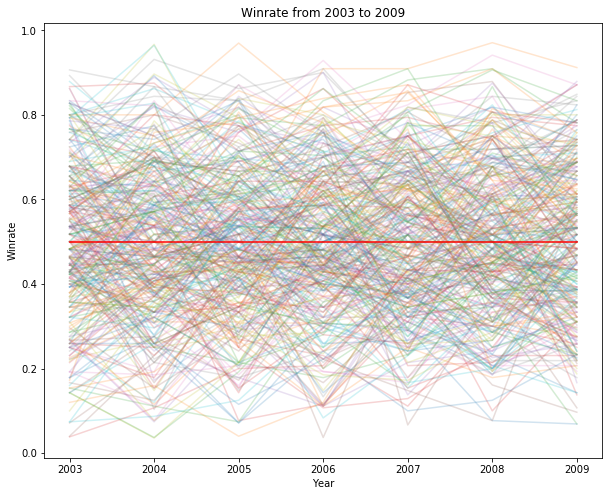

In [9]:
pylab.figure(figsize=(10,8))
for i in train.Wteam.unique():
    try: 
        pylab.plot(years, [train_win_res.loc[y,i]['Winrate'] for y in years], alpha=0.2)
    except Exception as e:
        pass
        
pylab.title("Winrate from 2003 to 2009")
pylab.ylabel("Winrate")
pylab.xlabel("Year")
pylab.plot([2003,2009], [0.5,0.5], c = "red")

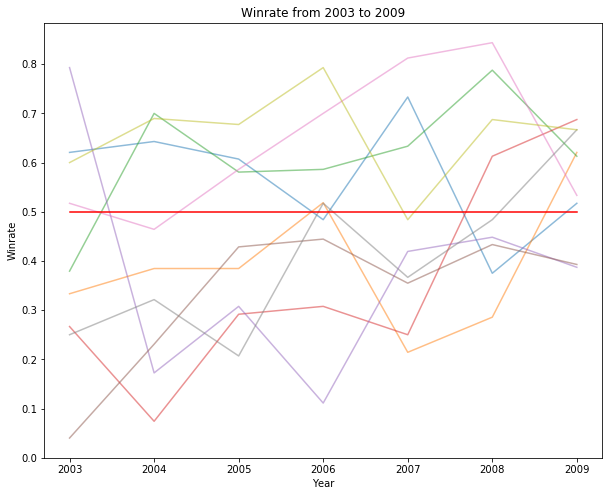

In [13]:
pylab.figure(figsize=(10,8))
for i in sample_team:
    try: 
        pylab.plot(years, [train_win_res.loc[y,i]['Winrate'] for y in years], alpha=0.5)
    except Exception as e:
        pass
        
pylab.title("Winrate from 2003 to 2009")
pylab.ylabel("Winrate")
pylab.xlabel("Year")
pylab.plot([2003,2009], [0.5,0.5], c = "red")

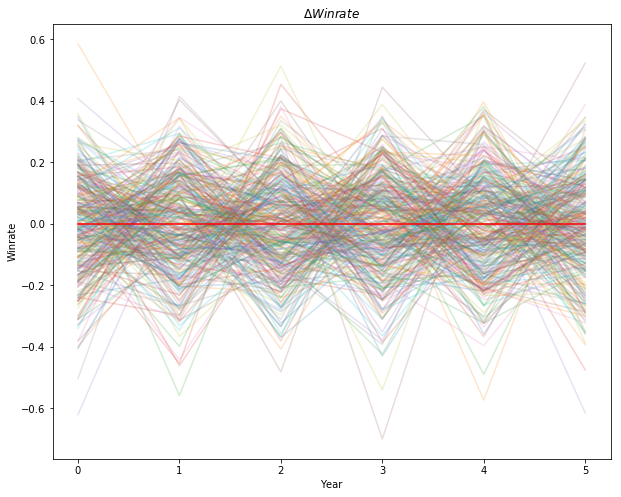

In [14]:
pylab.figure(figsize=(10,8))
for i in train.Wteam.unique():
    try: 
        pylab.plot([train_win_res.loc[2004+y,i]['Winrate']-train_win_res.loc[2003+y,i]['Winrate'] \
                    for y in range(len(years)-1)], alpha=0.2)
    except Exception as e:
        pass
        
pylab.title("$\Delta Winrate$")
pylab.ylabel("Winrate")
pylab.xlabel("Year")
pylab.plot([0,0,0,0,0,0,], c = "red")

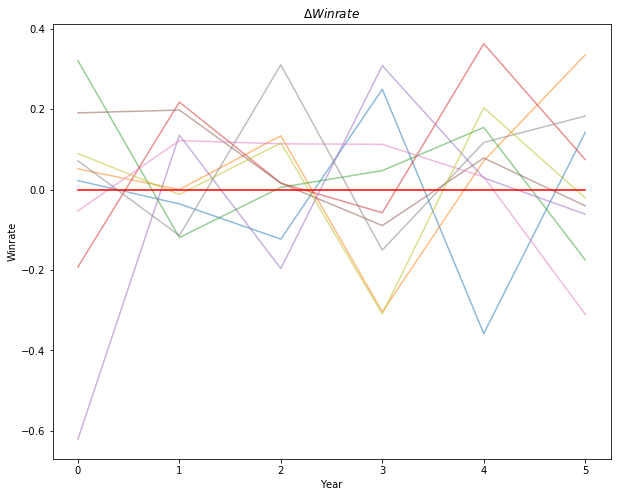

In [19]:
pylab.figure(figsize=(10,8))
for i in sample_team:
    try: 
        pylab.plot([train_win_res.loc[2004+y,i]['Winrate']-train_win_res.loc[2003+y,i]['Winrate'] \
                    for y in range(len(years)-1)], alpha=0.5)
    except Exception as e:
        pass
        
pylab.title("$\Delta Winrate$")
pylab.ylabel("Winrate")
pylab.xlabel("Year")
pylab.plot([0,0,0,0,0,0,], c = "red")

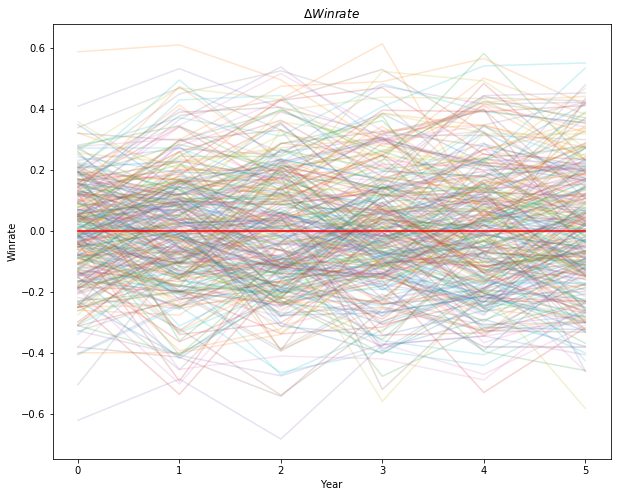

In [20]:
pylab.figure(figsize=(10,8))
for i in train.Wteam.unique():
    try: 
        pylab.plot([train_win_res.loc[2004+y,i]['Winrate']-train_win_res.loc[2003,i]['Winrate'] \
                    for y in range(len(years)-1)], alpha=0.2)
    except Exception as e:
        pass
        
pylab.title("$\Delta Winrate$")
pylab.ylabel("Winrate")
pylab.xlabel("Year")
pylab.plot([0,0,0,0,0,0,], c = "red")

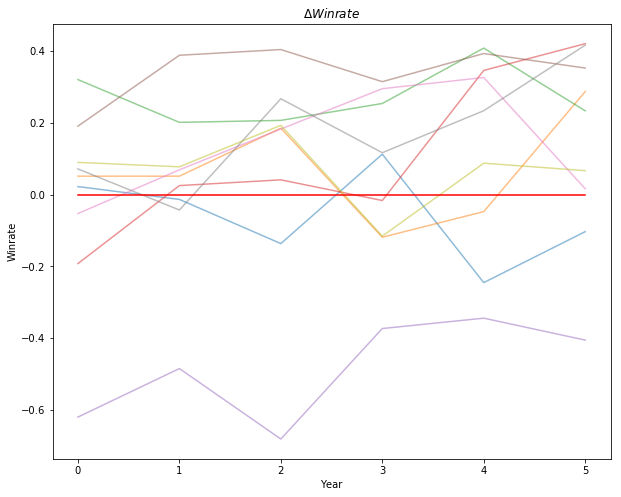

In [21]:
pylab.figure(figsize=(10,8))
for i in sample_team:
    try: 
        pylab.plot([train_win_res.loc[2004+y,i]['Winrate']-train_win_res.loc[2003,i]['Winrate'] \
                    for y in range(len(years)-1)], alpha=0.5)
    except Exception as e:
        pass
        
pylab.title("$\Delta Winrate$")
pylab.ylabel("Winrate")
pylab.xlabel("Year")
pylab.plot([0,0,0,0,0,0,], c = "red")

In [18]:
col = train.columns
wcol = [i for i in col if (i[0]=="W" and i!="Wloc" and i!="Wteam")]
lcol = [i for i in col if (i[0]=="L" and i!="Lteam")]
len(wcol)==len(lcol)

True

In [13]:
X = train.groupby("Wteam").sum()[wcol]
X += train.groupby("Lteam").sum()[lcol].as_matrix()
X = X/np.hstack([train.groupby('Wteam').count()["Lteam"].as_matrix().reshape(-1,1) for i in range(14)])

In [14]:
X.sample(10)

,Wscore,Wfgm,Wfga,Wfgm3,Wfga3,Wftm,Wfta,Wor,Wdr,Wast,Wto,Wstl,Wblk,Wpf
Wteam,,,,,,,,,,,,,,
1328,100.139073,35.403974,78.503311,9.291391,25.947020,20.039735,28.986755,17.801325,33.403974,19.562914,18.735099,10.456954,5.854305,25.463576
1442,268.155556,92.600000,219.177778,24.200000,70.066667,58.755556,85.222222,43.066667,89.355556,52.222222,63.577778,25.400000,8.511111,80.422222
1306,188.272727,64.393939,158.878788,22.227273,65.545455,37.257576,55.151515,31.484848,67.757576,35.333333,44.166667,17.196970,6.666667,55.000000
1261,112.257353,40.235294,88.183824,9.301471,26.507353,22.485294,32.176471,18.933824,39.522059,22.411765,21.735294,11.191176,8.073529,25.352941
1363,253.568627,93.666667,225.254902,19.058824,59.000000,47.176471,71.529412,46.254902,87.215686,48.039216,56.254902,22.803922,9.078431,72.333333
1344,136.141593,48.530973,106.486726,12.477876,35.460177,26.601770,37.601770,23.743363,41.610619,27.893805,27.504425,14.840708,8.725664,31.584071
1372,107.610619,38.292035,86.008850,8.858407,24.610619,22.168142,31.823009,17.318584,35.530973,20.141593,21.557522,11.176991,3.371681,30.619469
1192,149.567010,53.381443,122.938144,14.216495,41.845361,28.587629,42.103093,24.020619,47.546392,28.463918,30.195876,13.463918,8.463918,38.051546
1240,187.430556,66.541667,149.736111,18.430556,50.472222,35.916667,53.750000,30.666667,57.027778,37.750000,38.111111,20.208333,7.750000,52.694444


In [15]:
X.to_csv("./data/Mean_team_param.csv")

In [16]:
teams = X

In [17]:
teams = teams.reset_index()

In [18]:
y = np.random.randint(0,2,train.shape[0])
X = train[["Wteam","Lteam"]]
X["Wteam"] = train.Wteam*y+train.Lteam*(1-y)
X["Lteam"] = train.Lteam*y+train.Wteam*(1-y)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
X = pd.merge(X, teams, left_on = "Wteam", right_on="Wteam").drop("Wteam", 1)
X = pd.merge(X, teams, left_on = "Lteam", right_on="Wteam").drop(["Wteam", "Lteam"], 1)

In [137]:
X.head()

,Wscore_x,Wfgm_x,Wfga_x,Wfgm3_x,Wfga3_x,Wftm_x,Wfta_x,Wor_x,Wdr_x,Wast_x,...,Wfga3_y,Wftm_y,Wfta_y,Wor_y,Wdr_y,Wast_y,Wto_y,Wstl_y,Wblk_y,Wpf_y
0,110.438163,38.816254,86.964664,10.477032,29.017668,22.328622,31.159011,18.095406,37.335689,20.791519,...,30.007905,24.818182,35.608696,19.940711,41.284585,20.774704,22.41502,11.727273,7.541502,29.715415
1,110.438163,38.816254,86.964664,10.477032,29.017668,22.328622,31.159011,18.095406,37.335689,20.791519,...,30.007905,24.818182,35.608696,19.940711,41.284585,20.774704,22.41502,11.727273,7.541502,29.715415
2,110.438163,38.816254,86.964664,10.477032,29.017668,22.328622,31.159011,18.095406,37.335689,20.791519,...,30.007905,24.818182,35.608696,19.940711,41.284585,20.774704,22.41502,11.727273,7.541502,29.715415
3,128.625551,45.048458,104.753304,11.356828,32.933921,27.171806,39.766520,23.136564,46.105727,24.220264,...,30.007905,24.818182,35.608696,19.940711,41.284585,20.774704,22.41502,11.727273,7.541502,29.715415
4,128.625551,45.048458,104.753304,11.356828,32.933921,27.171806,39.766520,23.136564,46.105727,24.220264,...,30.007905,24.818182,35.608696,19.940711,41.284585,20.774704,22.41502,11.727273,7.541502,29.715415


In [138]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [139]:
models = {"XGBoost" : xgb.XGBClassifier(), 
          "LogReg" : LogisticRegression(),
          "RandomForest" : RandomForestClassifier()}

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
scores = {i : -np.mean(cross_val_score(models[i], X, y, scoring = 'neg_log_loss')) for i in models}

In [142]:
for i in scores:
    print(i, scores[i])

XGBoost 0.699839791486
LogReg 0.693574606489
RandomForest 0.91416184772


In [143]:
Cs = [0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 10, 25, 50, 100, 250]
s = [-np.mean(cross_val_score(LogisticRegression(C=i), X, y, scoring = 'neg_log_loss')) for i in Cs]

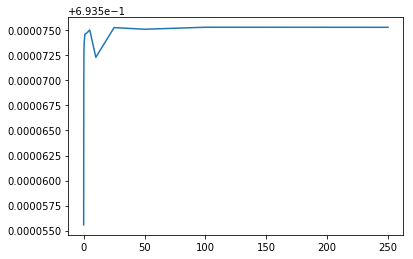

In [144]:
pylab.plot(Cs, s)

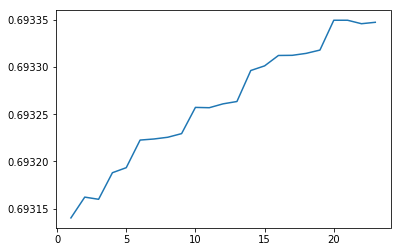

In [148]:
Cs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
s = [-np.mean(cross_val_score(xgb.XGBClassifier(n_estimators=i, max_depth=1), X, y, scoring = 'neg_log_loss')) for i in Cs]
pylab.plot(Cs, s)

In [149]:
min(s)

0.69314030082929168